In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/ML Dataset/insurance.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Treating NA Values
data.shape

(1338, 7)

In [9]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

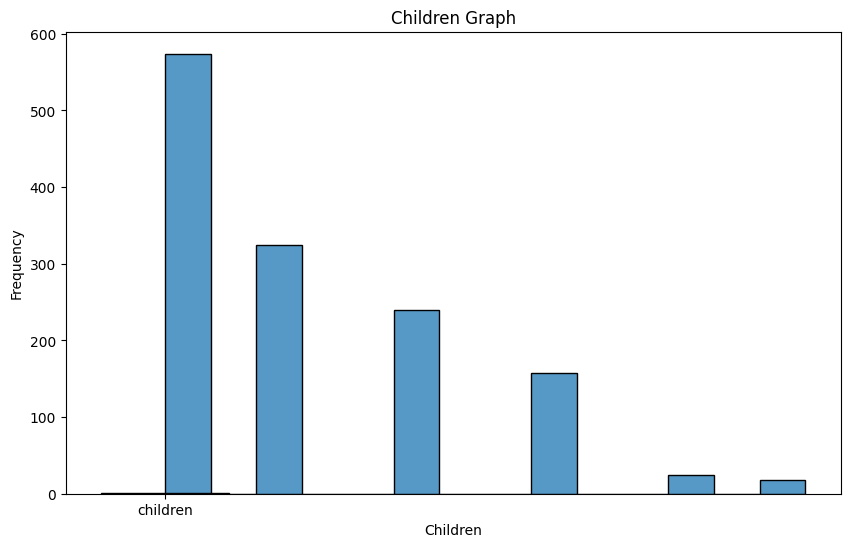

In [10]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data['children'])
sns.histplot(data=['children'], kde=True)
plt.title('Children Graph')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show

In [11]:
# Heatmap
data.corr()

/tmp/ipykernel_1680/1420183177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


/tmp/ipykernel_1680/2956917375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

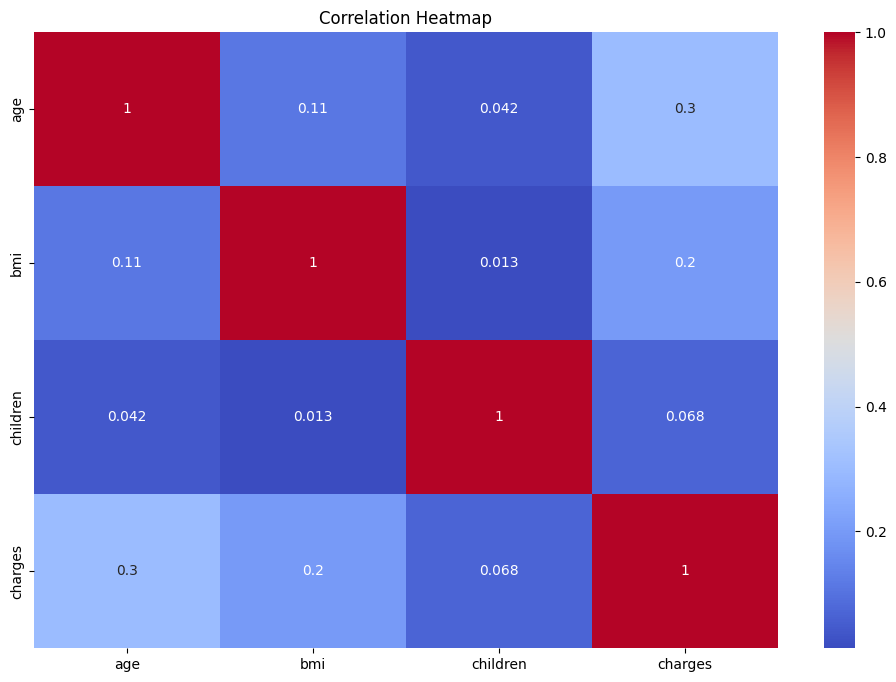

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

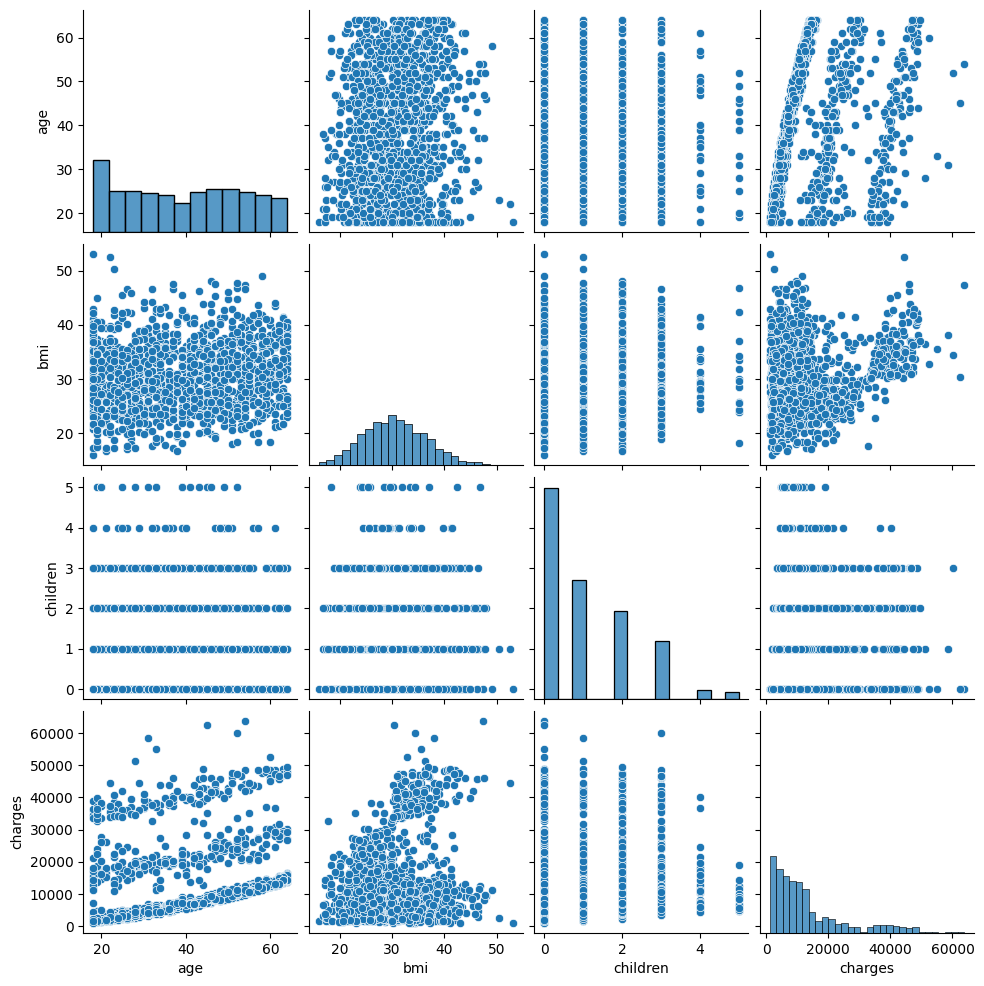

In [13]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(data[['age','bmi','children','charges']])
plt.show

In [14]:
# Linear Regression

x = data[['age', 'children']]
x1 = data["age"]
x2 = data["children"]

y = data['charges']

In [15]:
# Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# Training / Fitting model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# Making Predictions
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Sqaure Error", mse)
print("R-squared:", r2)

Mean Sqaure Error 9317.522415101628
R-squared: 0.08315125916375743


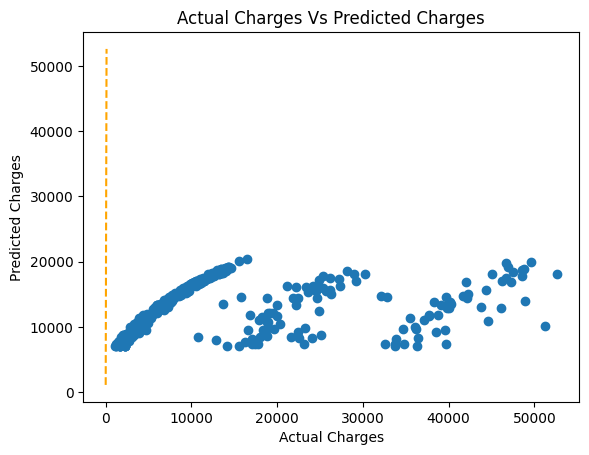

In [19]:
# Correlation Graph

# Scatter plot of predicted charges
plt.scatter(y_test, y_pred)

# Plot the identify line (best fit line)
x_line = np.linspace(min(min(y_test),min(y_pred)),max(max(y_test),max(y_pred)),100)
plt.plot(x_line, color='orange', linestyle='--', label='Best Fit Line')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges Vs Predicted Charges")
plt.show()

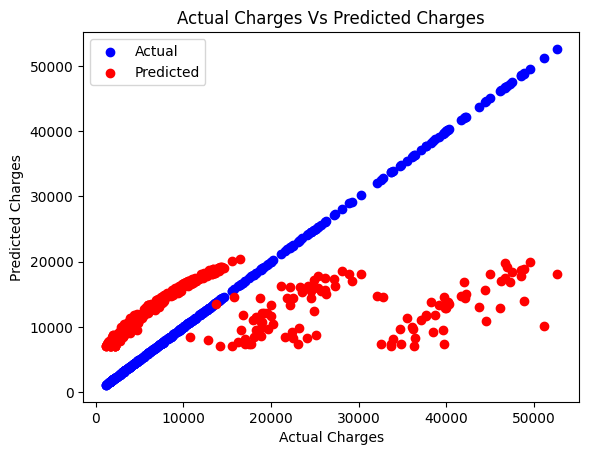

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of actual charges
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Scatter plot of predicted charges
plt.scatter(y_test, y_pred, color='red', label='Predicted')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges Vs Predicted Charges")
plt.legend()
plt.show()
